# Relativistics (2c-SCF)

Here code examples for properties output from scalar-relativistic (SR) and spin-orbit coupling (SOC) calculations are given. In the following text, these calculations are referred to as 2c-SCF.

**NOTE**

So far due to the efficiency concerns, only 2D densities are available. Developers are working actively to address the 3D plotting issues.

## The 'read_relativistics' method

This method is defined in the `crystal_io.Properties_output` class, which read formatted output files generated by CRYSTAL and return to classes defined in the `relativistics` module (see below). The object is also accessible by calling the `<type>` attribute of the `Properties_output` object.

The standard output and data type is required to identify the sequence and range of 2D vector fields in the fort.25 file. Otherwise the user must explicitly specify `index` which starts from 0.

In [1]:
from CRYSTALpytools.crystal_io import Properties_output

obj = Properties_output('relt_WSe2.out')
obj.read_relativistics('relt_WSe2.f25', type='SPICURDENS')
print('Type: {}'.format(type(obj.SPICURDENS)))
print('Base vectors (point A, B, C):')
print(obj.SPICURDENS.base)
print('Jx dimensionality:')
print(obj.SPICURDENS.data_x.shape)

Type: <class 'CRYSTALpytools.relativistics.SpinCurrentDensity'>
Base vectors (point A, B, C):
[[ 0.       3.26209  0.     ]
 [ 0.       0.       0.     ]
 [ 2.82505 -1.63104  0.     ]]
Jx dimensionality:
(50, 50, 3)


With the same object and file, get magnetization.

In [2]:
obj.read_relativistics('relt_WSe2.f25', type='MAGNETIZ')
print('Type: {}'.format(type(obj.MAGNETIZ)))
print('Base vectors (point A, B, C):')
print(obj.MAGNETIZ.base)
print('Data dimensionality:')
print(obj.MAGNETIZ.data.shape)

Type: <class 'CRYSTALpytools.relativistics.Magnetization'>
Base vectors (point A, B, C):
[[ 0.       3.26209  0.     ]
 [ 0.       0.       0.     ]
 [ 2.82505 -1.63104  0.     ]]
Data dimensionality:
(50, 50, 3)


Use list inputs for 3D grid data. Must follow 'X, Y, Z' or 'XX, XY, XZ, YX, YY, YZ, ZX, ZY, ZZ' sequences.

In [3]:
from CRYSTALpytools.crystal_io import Properties_output

obj = Properties_output('relt_WSe2_3D.out')
obj.read_relativistics(['relt_WSe2_3DJX.cube', 'relt_WSe2_3DJY.cube', 'relt_WSe2_3DJZ.cube'], type='ORBCURDENS')
print('Type: {}'.format(type(obj.ORBCURDENS)))
print('Base vectors (point A, B, C):')
print(obj.ORBCURDENS.base)
print('Data dimensionality:')
print(obj.ORBCURDENS.data.shape)

Type: <class 'CRYSTALpytools.relativistics.OrbitalCurrentDensity'>
Base vectors (point A, B, C):
[[ 0.          0.         -8.36564981]
 [ 2.825039   -1.63105487 -8.36564981]
 [ 0.          3.26208381 -8.36564981]
 [ 0.          0.          8.36559266]]
Data dimensionality:
(252, 50, 50, 3)


/tmp/ipykernel_10539/3762038831.py:4: UserWarning: Inconsistent geometry between property output and CUBE. Using property output's.
  obj.read_relativistics(['relt_WSe2_3DJX.cube', 'relt_WSe2_3DJY.cube', 'relt_WSe2_3DJZ.cube'], type='ORBCURDENS')


## The 'relativistics' module

So far the relativistics module is mainly developed for 2D plotting proposes.

### The 'ChargeDensity' class

The `ChargeDensity` class is the same as the `electronics.ChargeDensity` class, with the spin dimension equals to 1. Only the `from_file` classmethod is redefined. Output is mandatory.

Instantiate the object and plot charge density.

Type: <class 'CRYSTALpytools.relativistics.ChargeDensity'>


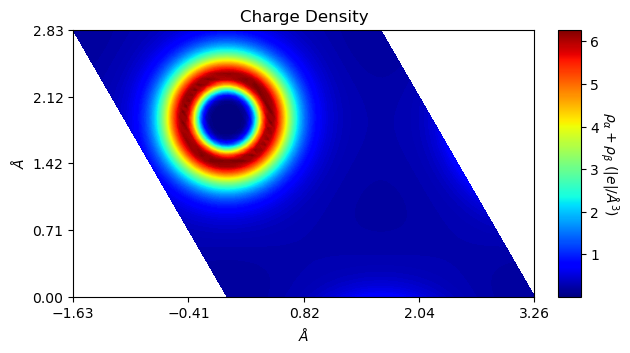

In [1]:
from CRYSTALpytools.relativistics import ChargeDensity

obj = ChargeDensity.from_file('relt_WSe2.f25', 'relt_WSe2.out')
print('Type: {}'.format(type(obj)))

fig = obj.plot_2D(option='charge')

### The 'VectorField'-based classes - 2D visualization

The `VectorField` class is the basic class for vector fields obtained by 2c-SCF. Depending on the specific properties, child classes are generated, which shares similar methods:

`Magnetization`, `OrbitalCurrentDensity` and `SpinCurrentDensity`.

All the classes are aimed to be independent of dimensionality, but currently only 2D data has been implemented.

Express plotting of magnetization field of WSe2 on W atom plane.

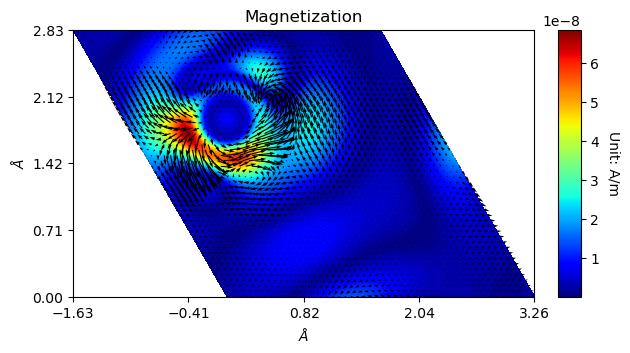

In [2]:
from CRYSTALpytools.relativistics import Magnetization

fig = Magnetization.from_file('relt_WSe2.f25', 'relt_WSe2.out').plot_2D()

The color-filled contours represent the length of vectors in 3D space. The quiver plot marks the projection of these vectors on the plane.

Similarly, a color-coded quiver plot can be obtained.

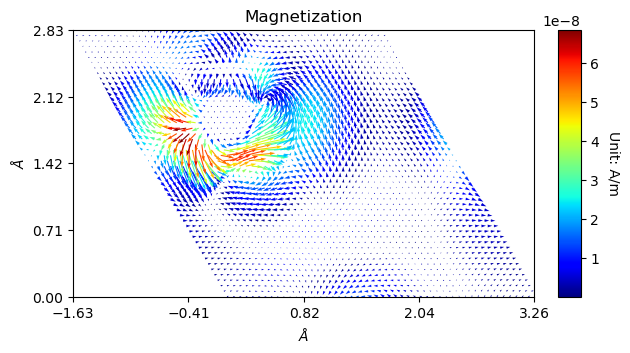

In [3]:
from CRYSTALpytools.relativistics import Magnetization

fig = Magnetization.from_file('relt_WSe2.f25', 'relt_WSe2.out').plot_2D(
    quiverplot=True, colorplot=False
)

With `quiverplot=False` and `colorplot=True`, the scalar field of vector norms can be obtained.

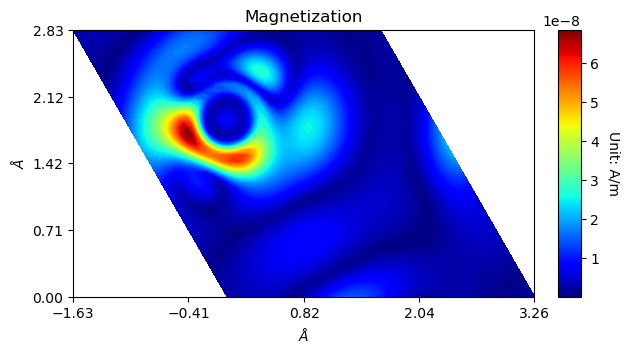

In [4]:
from CRYSTALpytools.relativistics import Magnetization

fig = Magnetization.from_file('relt_WSe2.f25', 'relt_WSe2.out').plot_2D(
    quiverplot=False, colorplot=True
)

In any cases, the figure manipulation option can be enabled, though it is trickier to 'hide' the original bounaries.

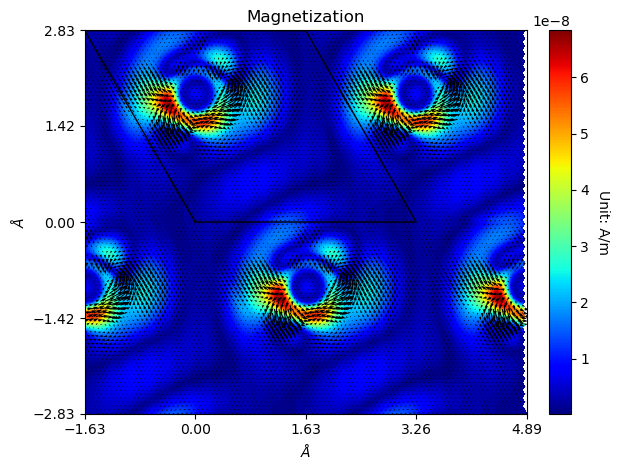

In [5]:
from CRYSTALpytools.relativistics import Magnetization

fig = Magnetization.from_file('relt_WSe2.f25', 'relt_WSe2.out').plot_2D(
    rectangle=True, a_range=[-1, 1], b_range=[-1, 1], edgeplot=True
)

For spin-current densities, `direction` should be specified as a string or a list of string to plot $J^{x}$, $J^{y}$ or $J^{z}$.

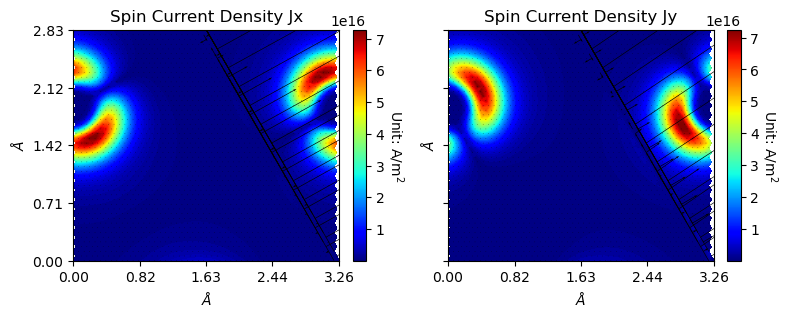

In [6]:
from CRYSTALpytools.relativistics import SpinCurrentDensity

fig = SpinCurrentDensity.from_file('relt_WSe2.f25', 'relt_WSe2.out').plot_2D(
    direction=['x', 'y'], figsize=[8, 6],  rectangle=True,
)

### The 'VectorField'-based classes - 3D visualization

For 3D vector fields, the `from_file` method requires list input defining projections of vectors on the grid, written in CUBE files.
`Magnetization` and `OrbitalCurrentDensity` requires three CUBE files, while `SpinCurrentDensity` requires nine.

Plot orbital current density as 3D vector field.

In [10]:
from CRYSTALpytools.relativistics import OrbitalCurrentDensity

fig = OrbitalCurrentDensity.from_file(['relt_WSe2_3DJX.cube',
                                       'relt_WSe2_3DJY.cube',
                                       'relt_WSe2_3DJZ.cube'], 'relt_WSe2_3D.out').plot_3D(
    atom_color='jmol', atom_bond_ratio='large', display_range=[[0,2], [0,2], [-0.05, 0.05]], vec_linescale=2,
    vec_grid_display_range=[[0,2], [0,2], [0,1]], vec_vmin=1.5e+3)

MayaVi output

<img src="./relt_WSe2_3D_Vec.png" width="480">

Note that vectors whose norm are smaller than `vec_vmin` are masked.

Plot 3D vector field with isosurface of norm = 1500. In this example, the colors of vectors and surfaces are user-defined, therefore color bars are turned off.

In [5]:
from CRYSTALpytools.relativistics import OrbitalCurrentDensity
fig = OrbitalCurrentDensity.from_file(['relt_WSe2_3DJX.cube',
                                       'relt_WSe2_3DJY.cube',
                                       'relt_WSe2_3DJZ.cube'], 'relt_WSe2_3D.out').plot_3D(
    atom_color='jmol', atom_bond_ratio='large', display_range=[[0,4], [0,4], [-0.05, 0.05]],
    vec_linescale=2, vec_grid_display_range=[[0,4], [0,4], [0,1]], vec_vmin=1.5e+3, vec_mask=25,
    vec_colormap=(0, 0.6, 0.6),
    scal_plot=True, isovalue=1.5e+3, opacity=0.5, scal_grid_display_range=[[0,4], [0,4], [0,1]],
    scal_colormap=(1, 1, 0))

MayaVi output

<img src="./relt_WSe2_3D_VecScal.png" width="480">

This method also accepts 2D vector fields, where 3D vectors are defined on the 2D grid, formatted in fort.25 files.

Plot spin current density along x direction as quiver plots.

In [14]:
from CRYSTALpytools.relativistics import SpinCurrentDensity

fig = SpinCurrentDensity.from_file('relt_WSe2.f25', 'relt_WSe2.out').plot_3D(
    direction='x',
    atom_color='jmol', display_range=[[0,4], [0,4], [-0.05, 0.05]],
    vec_grid_display_range=[[0,4], [0,4]], vec_mask=10, vec_linescale=2)

MayaVi output

<img src="./relt_WSe2_2D_Vec.png" width="480">

Similarly, plot 2D contour with 3D vectors.

In [26]:
from CRYSTALpytools.relativistics import SpinCurrentDensity

fig = SpinCurrentDensity.from_file('relt_WSe2.f25', 'relt_WSe2.out').plot_3D(
    direction='z',
    atom_color='jmol', display_range=[[0,2], [0,2], [-0.05, 0.05]],
    scal_plot=True,
    scal_grid_display_range=[[0,2], [0,2]],
    vec_grid_display_range=[[0,2], [0,2]], vec_mask=10, vec_colormap=(0.8,0.8,0.8))

MayaVi output

<img src="./relt_WSe2_2D_VecScal.png" width="480">

## The 'plot_relativistics2D' function

Similar to other modules, the `plot.plot_relativistics2D()` function manages multiple objects / files and set the uniform scale for them.

**NOTE**

1. Not for the `ChargeDensity` class. Use the `plot.plot_ECHG()` for them.  
2. For filename inputs, the standard screen output is mandatory and should be given as string or a list of string for every input file.

Plot the orbital and spin current densities ($J^{z}$) into 3 subplots.

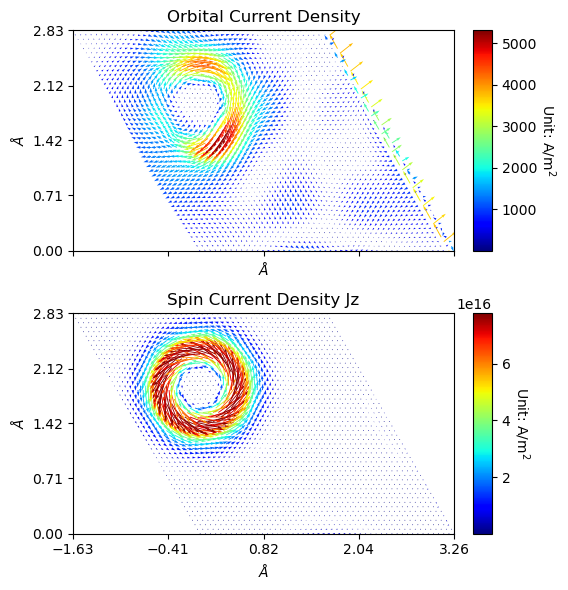

In [27]:
from CRYSTALpytools.plot import plot_relativistics2D

fig = plot_relativistics2D(
    'relt_WSe2.f25', type=['ORBCURDENS', 'SPICURDENS'], output='relt_WSe2.out',
    colorplot=False, direction='z', layout=[2, 1], figsize=[6, 6])

The following code block is only used to generate a nice thumbnail for the example gallary.

This is the end of the example notebook. For more details, please refer to the [API documentations](https://crystal-code-tools.github.io/CRYSTALpytools/crystalpytools.relativistics.html).

(-0.5, 812.5, 573.5, -0.5)

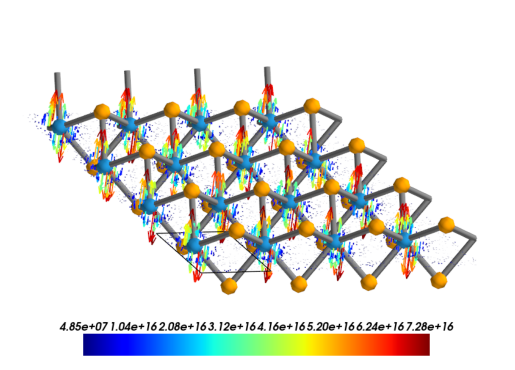

In [29]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.imshow(plt.imread("./relt_WSe2_2D_Vec.png"))
ax.axis('off')